### 逻辑回归预测考试通过

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('examdata.csv')
data.head()

,Exam1,Exam2,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0, 0.5, 'Exam2')

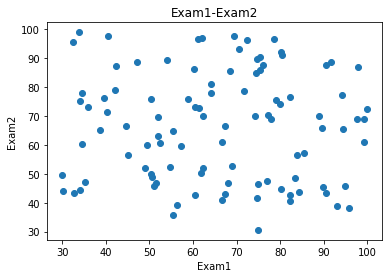

In [4]:
fig1=plt.figure()
plt.scatter(data.loc[:,'Exam1'],data.loc[:,'Exam2'])
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')

Text(0, 0.5, 'Exam2')

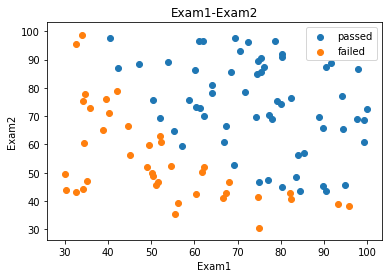

In [6]:
mask=data.loc[:,'Pass']==1
passed=plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed=plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.title('Exam1-Exam2')
plt.legend((passed,failed),('passed','failed'))
plt.xlabel('Exam1')
plt.ylabel('Exam2')

In [11]:
X=data.drop(['Pass'],axis=1)
y=data.loc[:,'Pass']
X1=data.loc[:,'Exam1']
X2=data.loc[:,'Exam2']

In [13]:
from sklearn.linear_model import LogisticRegression
print(X.shape,y.shape)
LR=LogisticRegression()
LR.fit(X,y)

(100, 2) (100,)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_predict=LR.predict(X)
y_predict
from sklearn.metrics import accuracy_score
accuracy_score(y,y_predict)

0.89

In [18]:
y_test=LR.predict([[70,65]])
y_test

array([1])

In [19]:
LR.coef_

array([[0.20535491, 0.2005838 ]])

In [21]:
LR.intercept_

array([-25.05219314])

In [22]:
theta0=LR.intercept_
theta1,theta2=LR.coef_[0][0],LR.coef_[0][1]

In [23]:
X2_new=-(theta0+theta1*X1)/theta2

Text(0, 0.5, 'Exam2')

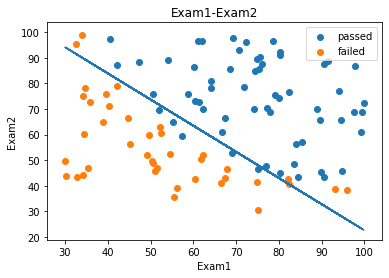

In [24]:
fig3=plt.figure()
plt.plot(X1,X2_new)
passed=plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed=plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.title('Exam1-Exam2')
plt.legend((passed,failed),('passed','failed'))
plt.xlabel('Exam1')
plt.ylabel('Exam2')

In [25]:
X1_2=X1*X1
X2_2=X2*X2
X1_X2=X1*X2

In [30]:
X_new={
    'X1':X1,
    'X2':X2,
    'X1_2':X1_2,
    'X2_2':X2_2,
    'X1_X2':X1_X2
}
X_new=pd.DataFrame(X_new)

In [31]:
LR2=LogisticRegression()
LR2.fit(X_new,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y2_predict=LR2.predict(X_new)
accuracy_score(y,y2_predict)

1.0

In [40]:
LR2.coef_

X1_new=X1.sort_values()

In [41]:
theta0=LR2.intercept_
theta1,theta2,theta3,theta4,theta5=LR2.coef_[0][0],LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]

In [45]:
a=theta4
b=theta5*X1_new+theta2
c=theta0+theta1*X1_new+theta3*X1_new*X1_new
X2_new_boundary=(-b+np.sqrt(b*b-4*a*c))/(2*a)

Text(0, 0.5, 'Exam2')

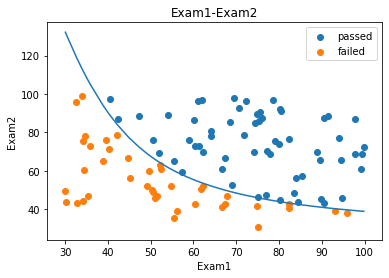

In [46]:
fig4=plt.figure()
plt.plot(X1_new,X2_new_boundary)
passed=plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed=plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.title('Exam1-Exam2')
plt.legend((passed,failed),('passed','failed'))
plt.xlabel('Exam1')
plt.ylabel('Exam2')